# The Battle of the Neighborhood

##### By MFugulin Jul 2021




### Introduction

Due to the "Lockdown", several restaurants closed their doors, with the need to adapt their ways of serving their customers.

Two forms of service were established by most restaurants and snack bars: delivery and on-site collection (collection on the sidewalk), as they present the lowest initial investment.

In "Collect on the Sidewalk" mode, the customer continues to go to the place, but withdrawing their orders, where the cost is almost zero for the entrepreneur. The other modality that already existed before was delivery through companies such as Ritual, Doordash, Skip the Dishes, among others, but the cost is high.

Thus, some entrepreneurs thought of themselves starting the process of delivering products to their customers, within a restricted distance area.

This is an excellent opportunity to create a model that can be suitable for any restaurant that wants this analysis, helping small business owners to adapt their businesses, get to know the competition better and make a better investment decision in this service (or not).


### Business Problem
Know better your Neighborhood and competition for delivery services: How many restaurants are there in the area to offer the analysis? What types of restaurants are in this region? What is the income of people in the same region to determine the prices to be charged? Where is the best area to provide the delivery services wit best return of investment? The budget is limite and all investments must be very well oriented. 


### Objective
Create a model to obtain the requested data and seek the best way to serve customers through the restaurants that are 5km away of Toronto to be used as a benchmark.

One key outcome of this model is determine the most strategic region(s) in Toronto for restaurant(s) can strategically expand its services, as the budget is limited due to the limitations imposed during the pandemic.

The model will be able to serve several restaurant owners who have the need to provide delivery services. This business analisys model can be applied to any restaurants, we just will need include the locations to provide this analitical report to the customer and helo him to understand the senario and data relevance for the investments. 


### The process to reach the goals 
Join libraries and databases data into a data frame.
For the number of restaurants, types, etc., I used the Foursquare into 5 Km distance of a specific point (this point can be changed as need per the restaurant interested in this analysis). 

All strategic data as locations, neighborhoods, incomes (net) will be analyzed via k-means clustering.

##### Sources/Databases
- Foursquare to find restaurants 
- Wikipedia to find the locations
- Wellbeing Toronto for Demographic/ socioeconomic


## Importing Datasets

### Toronto Data

In [1]:
# libraries
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

# Wikipedia
df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]
df = df[df.Borough!='Not assigned']
#df.shape

In [2]:
#copy df
toronto_df = df.copy()

# Nneighborhood coordinates & Data Shape
location_coordinates = pd.read_csv (r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
location_coordinates.rename(columns={'Postal Code': 'Postcode'}, inplace=True)

# Data shape
toronto_loc_data = pd.merge(toronto_df, location_coordinates, on='Postcode', how='inner')
toronto_loc_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
...,...,...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West,43.628841,-79.520999
206,M8Z,Etobicoke,Mimico NW,43.628841,-79.520999
207,M8Z,Etobicoke,The Queensway West,43.628841,-79.520999
208,M8Z,Etobicoke,Royal York South West,43.628841,-79.520999


### Household Income Dataset - Toronto

In [3]:
# Household income 
income_toronto_url = 'https://raw.githubusercontent.com/thatjosh/IBM-Data-Science-Capstone-Project/master/income_toronto.csv'
income_path = pd.read_csv(income_toronto_url)
df_income = pd.DataFrame(income_path)
df_income.drop(['Neighbourhood Id'], axis=1, inplace=True)
#df_income.shape

### Population Size Dataset

In [4]:
pop_toronto_url = 'https://raw.githubusercontent.com/thatjosh/IBM-Data-Science-Capstone-Project/master/population_toronto.csv'
pop_path = pd.read_csv(pop_toronto_url)
df_pop = pd.DataFrame(pop_path)
df_pop.drop(['Neighbourhood Id'], axis=1, inplace=True)
#df_pop.shape
print ('\n Neighbourhood and Total Population')
df_pop


 Neighbourhood and Total Population


,Neighbourhood,Total Population
0,West Humber-Clairville,33312.0
1,Mount Olive-Silverstone-Jamestown,32954.0
2,Thistletown-Beaumond Heights,10360.0
3,Rexdale-Kipling,10529.0
4,Elms-Old Rexdale,9456.0
...,...,...
135,West Hill,27392.0
136,Woburn,53485.0
137,Eglinton East,22776.0
138,Scarborough Village,16724.0


### Join Datasets

In [5]:
loc_stats = pd.merge(df_income, df_pop, on='Neighbourhood', how='inner')
final_loc_stats = pd.merge(loc_stats, toronto_loc_data, on='Neighbourhood', how='inner')
final_loc_stats.head(35)

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452


### Foursquare

In [6]:
# My Credentials
CLIENT_ID = '4BED2AZYUDCEWQPPQQZZ5RBDQXDMQFBCWMHWNORZA3B0WSRC' # your Foursquare ID
CLIENT_SECRET = 'SHNJOCVCLRZO2EOKPR53ASTBYF0PQH1ZRDR05B52PGICWF04' # your Foursquare Secret
ACCESS_TOKEN = 'DWHEBCWF3JGXKY0Z5YQJBABAFILEDGU0FL5K1UII45LYFX1H'
VERSION = '20180604' # Foursquare API version
LIMIT = 300 # A default Foursquare API limit value
categoryId = 'zz'

# libraries
from pandas.io.json import json_normalize

In [7]:
# Forsquare location
radius = 5000
search_query = 'Restaurant*'

latitude = 43.643515
longitude = -79.577201

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT, categoryId)
# url

In [8]:
results = requests.get(url).json()
# results

In [9]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
MW_df = json_normalize(venues)
MW_df.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4b533ffdf964a5201a9427e3,Muddy Duck Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1626558752,False,2200 Dundas St. E,btw Regional Rd. 4 & Highway 407,43.625972,-79.565427,"[{'label': 'display', 'lat': 43.62597233051833...",2171,L4X 2V3,CA,Islington - City Centre West,Mississauga,ON,Canada,[2200 Dundas St. E (btw Regional Rd. 4 & Highw...,NaN
1,4bdf6678e75c0f470617cb03,Silk Road Restaurant 丝绸之路,"[{'id': '52af3b913cf9994f4e043c06', 'name': 'X...",v-1626558752,False,1852 Dundas St E,at Wharton Way,43.619278,-79.573031,"[{'label': 'display', 'lat': 43.61927817099883...",2718,L4X 1L9,CA,NaN,Mississauga,ON,Canada,"[1852 Dundas St E (at Wharton Way), Mississaug...",NaN
2,534b2c4c498e3290a42bc2f1,Cross Eyed Bear Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1626558752,False,555 Burnhamthorpe,The West Mall,43.644725,-79.568009,"[{'label': 'display', 'lat': 43.64472458866585...",752,M9C 2Y3,CA,NaN,Etobicoke,ON,Canada,"[555 Burnhamthorpe (The West Mall), Etobicoke ...",NaN
3,5dd098c5bf319f0008b5ba8d,Kahramana Restaurant,"[{'id': '5bae9231bedf3950379f89e7', 'name': 'I...",v-1626558752,False,3415 Dixie Road Unit 4A,NaN,43.617805,-79.595215,"[{'label': 'display', 'lat': 43.617805, 'lng':...",3209,L4Y 4J6,CA,NaN,Mississauga,ON,Canada,"[3415 Dixie Road Unit 4A, Mississauga ON L4Y 4...",NaN
4,50b633dee4b0efc209002435,The Olive Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1626558752,False,100 The East Mall,North Queen,43.619846,-79.549690,"[{'label': 'display', 'lat': 43.619846, 'lng':...",3443,M8Z 5X2,CA,Islington - City Centre West,Etobicoke,ON,Canada,"[100 The East Mall (North Queen), Etobicoke ON...",NaN


In [10]:
# Filtering columns with venue name + associated with location
filtered_columns = ['name', 'categories'] + [col for col in MW_df.columns if col.startswith('location.')] + ['id']
MW_df_filtered = MW_df.loc[:, filtered_columns]

# Filtering Venue per category
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtering the category 
MW_df_filtered['categories'] = MW_df_filtered.apply(get_category_type, axis=1)
print ('\n Restaurants per Category to offer our Business Model Analisys')
MW_df_filtered


 Restaurants per Category to offer our Business Model Analisys


,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,id
0,Muddy Duck Restaurant,American Restaurant,2200 Dundas St. E,btw Regional Rd. 4 & Highway 407,43.625972,-79.565427,"[{'label': 'display', 'lat': 43.62597233051833...",2171,L4X 2V3,CA,Islington - City Centre West,Mississauga,ON,Canada,[2200 Dundas St. E (btw Regional Rd. 4 & Highw...,4b533ffdf964a5201a9427e3
1,Silk Road Restaurant 丝绸之路,Xinjiang Restaurant,1852 Dundas St E,at Wharton Way,43.619278,-79.573031,"[{'label': 'display', 'lat': 43.61927817099883...",2718,L4X 1L9,CA,NaN,Mississauga,ON,Canada,"[1852 Dundas St E (at Wharton Way), Mississaug...",4bdf6678e75c0f470617cb03
2,Cross Eyed Bear Restaurant,Restaurant,555 Burnhamthorpe,The West Mall,43.644725,-79.568009,"[{'label': 'display', 'lat': 43.64472458866585...",752,M9C 2Y3,CA,NaN,Etobicoke,ON,Canada,"[555 Burnhamthorpe (The West Mall), Etobicoke ...",534b2c4c498e3290a42bc2f1
3,Kahramana Restaurant,Iraqi Restaurant,3415 Dixie Road Unit 4A,NaN,43.617805,-79.595215,"[{'label': 'display', 'lat': 43.617805, 'lng':...",3209,L4Y 4J6,CA,NaN,Mississauga,ON,Canada,"[3415 Dixie Road Unit 4A, Mississauga ON L4Y 4...",5dd098c5bf319f0008b5ba8d
4,The Olive Restaurant,Restaurant,100 The East Mall,North Queen,43.619846,-79.549690,"[{'label': 'display', 'lat': 43.619846, 'lng':...",3443,M8Z 5X2,CA,Islington - City Centre West,Etobicoke,ON,Canada,"[100 The East Mall (North Queen), Etobicoke ON...",50b633dee4b0efc209002435
5,VAHALLA RESTAURANT,Scandinavian Restaurant,314 W Center Ave,NaN,43.640954,-79.564951,"[{'label': 'display', 'lat': 43.64095401822603...",1027,93291,CA,NaN,Vahalla,CA,Canada,"[314 W Center Ave, Vahalla CA 93291, Canada]",4e8f1efebe7b11a0c4fd3f19
6,Restaurant Savana,American Restaurant,NaN,NaN,43.652166,-79.641770,"[{'label': 'display', 'lat': 43.65216594462269...",5289,NaN,CA,NaN,NaN,NaN,Canada,[Canada],4b9e3781f964a5208fd236e3
7,Best Friend Chinese Restaurant 老友記小廚,Chinese Restaurant,"888 Dundas St. E., Unit D1B",NaN,43.597756,-79.594227,"[{'label': 'display', 'lat': 43.59775555918656...",5275,L4Y 4G6,CA,NaN,Mississauga,ON,Canada,"[888 Dundas St. E., Unit D1B, Mississauga ON L...",4c3285c6a0ced13abf56156e
8,Perkins Restaurant & Bakery,American Restaurant,600 Dixon Rd,at Martin Grove Rd,43.691977,-79.572811,"[{'label': 'display', 'lat': 43.69197748145365...",5406,M9W 1J1,CA,NaN,Toronto,ON,Canada,"[600 Dixon Rd (at Martin Grove Rd), Toronto ON...",4b80c40ef964a520e68a30e3
9,Golden Wok Chinese Restaurant,Chinese Restaurant,120 Eringate Dr. Unit #3,Renforth Dr,43.660491,-79.582319,"[{'label': 'display', 'lat': 43.66049068196177...",1934,M9C 3Z8,CA,NaN,Toronto,ON,Canada,"[120 Eringate Dr. Unit #3 (Renforth Dr), Toron...",4bfefc3b68c7a593dc004044


In [11]:
# count number of restaurants
print('There',len(MW_df_filtered[['name']].drop_duplicates()),'Restaurants, under 5 Km Range from Toronto that we can offer this services!')

There 50 Restaurants, under 5 Km Range from Toronto that we can offer this services!


### Foursquare Restaurants

In [12]:
# Neighbourhood list

neighbourhood_list = list(final_loc_stats['Neighbourhood'])
neighbourhood_list[10]

'Bayview Village'

In [13]:
# From Forsquare

# 5Km Distance range
radius = 5000
search_query = 'Restaurant*'

# Global variable
i=0

# Oount restaurants
count_restaurant = []


for x in neighbourhood_list:
    
    i
    latitude = final_loc_stats.iloc[i]['Latitude']
    longitude = final_loc_stats.iloc[i]['Longitude']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    i = i + 1
    
    # JSON to venues
    venues = results['response']['venues']

    # Creating Venues dataframe
    total_df = json_normalize(venues)
    total_df.head()
    
    count_restaurant.append(len(total_df[['name']].drop_duplicates()))
    print(len(total_df[['name']].drop_duplicates()))

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


50
50
50
50
50
50
48
48
47
48
46
46
49
48
50
50
50
50
49
50
50
49
50
50
49
49
49
49
49
22
46
46
50
50
46


In [14]:
from pandas import DataFrame as df
count_restaurant_df = df(count_restaurant,columns=['Restaurant Count'])

## Restaurants per Neighbourhood

In [15]:
from pandas import DataFrame as df

final_loc_stat_2 = final_loc_stats

count_restaurant_df = df(count_restaurant,columns=['Restaurant Count']) 
final_loc_stat_2 = final_loc_stat_2.join(count_restaurant_df)
print ('\nRestaurants per Neighbourhood to offer our Business Model Analisys')
final_loc_stat_2


Restaurants per Neighbourhood to offer our Business Model Analisys


,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,50
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,50
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,50
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,50
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,50
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,50
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,48
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,48
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,47
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,48


### Data Analysis

In [16]:
# libraries - JSON to pandas dataframe
from pandas.io.json import json_normalize 
import json

# Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# Folium
!pip install folium
import folium

print("\n\n############################################## All Libraries Imported with Success ##############################################")

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


############################################## All Libraries Imported with Success ##############################################


In [17]:
map_Toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# copy df to aviid folium changing df
toronto_loc_f1 = final_loc_stats.copy()

# Markers on map
for lat, lng, borough, df_inner in zip(toronto_loc_f1['Latitude'], toronto_loc_f1['Longitude'], toronto_loc_f1['Borough'], toronto_loc_f1['Neighbourhood']):
    label = '{}, {}'.format(toronto_loc_f1, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186ca',
        fill_opacity=0.9,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [18]:
# import matplotlib

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Chart - Household Income (Net)

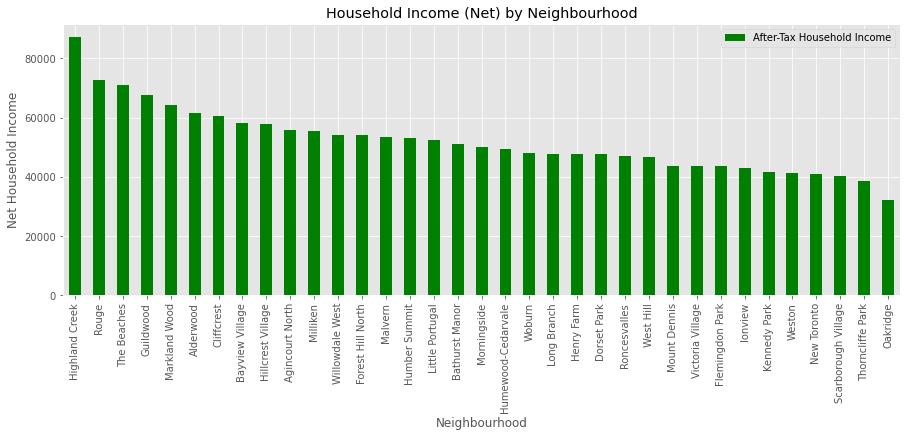

In [19]:
# define df
df_income = final_loc_stat_2[['Neighbourhood', 'After-Tax Household Income']].set_index('Neighbourhood')

# sort > to <
df_income.sort_values(by='After-Tax Household Income', ascending=False, inplace=True)

# ploting
mpl.style.use('ggplot')
df_income.plot(kind='bar', figsize=(15,5), color='g')
plt.title('Household Income (Net) by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Net Household Income')

plt.show()

In [20]:
# Absoluute values: Net Household Income vs Neighbourhood
df_income

,After-Tax Household Income
Neighbourhood,
Highland Creek,87321.0
Rouge,72784.0
The Beaches,70957.0
Guildwood,67678.0
Markland Wood,64297.0
Alderwood,61402.0
Cliffcrest,60384.0
Bayview Village,58028.0
Hillcrest Village,57682.0


### Chart - Population

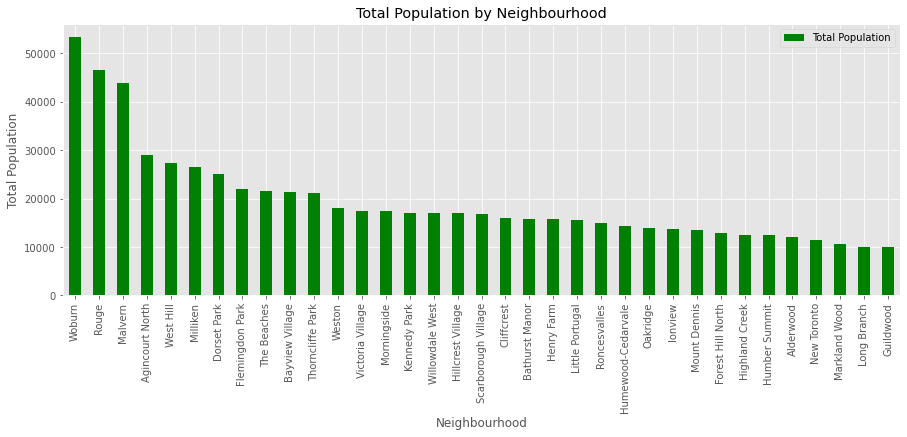

In [21]:
# define df
df_pop = final_loc_stat_2[['Neighbourhood', 'Total Population']].set_index('Neighbourhood')

# sort by > to < 
df_pop.sort_values(by='Total Population', ascending=False, inplace=True)

# ploting
mpl.style.use('ggplot')
df_pop.plot(kind='bar', figsize=(15,5), color='g')
plt.title('Total Population by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Population')

plt.show()

In [22]:
# Absoluute values: Total Population vs Neighbourhood
df_pop

,Total Population
Neighbourhood,
Woburn,53485.0
Rouge,46496.0
Malvern,43794.0
Agincourt North,29113.0
West Hill,27392.0
Milliken,26572.0
Dorset Park,25003.0
Flemingdon Park,21933.0
The Beaches,21567.0


### Chart - Number of Restaurants

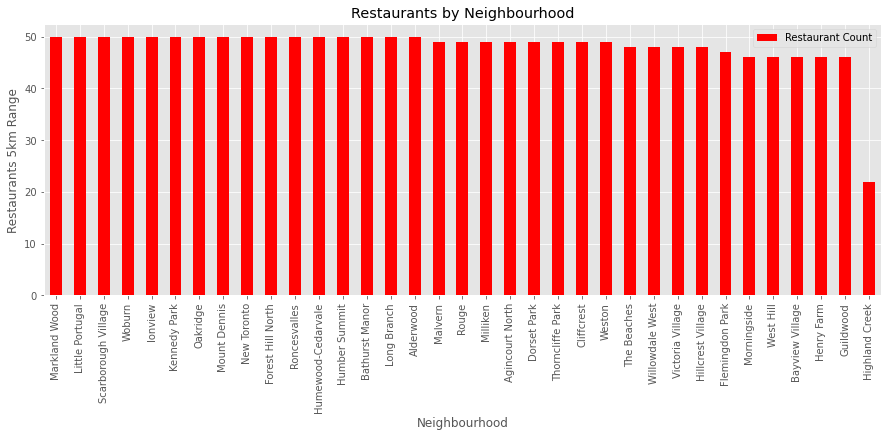

In [23]:

# define df
df_po_ven = final_loc_stat_2[['Neighbourhood', 'Restaurant Count']].set_index('Neighbourhood')

# sort by descending order
df_po_ven.sort_values(by='Restaurant Count', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_po_ven.plot(kind='bar', figsize=(15,5), color='r')
plt.title('Restaurants by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Restaurants 5km Range')

plt.show()

In [24]:
# absolute number of Restaurants per Neighbourhood
df_po_ven

,Restaurant Count
Neighbourhood,
Markland Wood,50
Little Portugal,50
Scarborough Village,50
Woburn,50
Ionview,50
Kennedy Park,50
Oakridge,50
Mount Dennis,50
New Toronto,50


### Clustering

In [25]:
#K-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

final_loc_stat_2

,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,50
1,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,50
2,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,50
3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,50
4,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,50
5,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,50
6,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,48
7,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,48
8,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,47
9,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,48


In [26]:
k=5
final_loc_stat_3 = final_loc_stat_2
cluster = final_loc_stat_3.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Restaurant Count'], axis = 1)
cluster.rename(columns={0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Restaurant Count'}, inplace=True)
cluster.head(10)

,Latitude,Longitude
0,43.643515,-79.577201
1,43.605647,-79.501321
2,43.602414,-79.543484
3,43.602414,-79.543484
4,43.756303,-79.565963
5,43.754328,-79.442259
6,43.782736,-79.442259
7,43.725882,-79.315572
8,43.725900,-79.340923
9,43.803762,-79.363452


In [27]:
kmeans = KMeans(n_clusters = k,random_state=0).fit(cluster)
kmeans.labels_

Toronto_data = final_loc_stat_3
Toronto_data.insert(0, 'Cluster Labels', kmeans.labels_)
Toronto_data

,Cluster Labels,Neighbourhood,After-Tax Household Income,Total Population,Postcode,Borough,Latitude,Longitude,Restaurant Count
0,3,Markland Wood,64297.0,10554.0,M9C,Etobicoke,43.643515,-79.577201,50
1,3,New Toronto,40859.0,11463.0,M8V,Etobicoke,43.605647,-79.501321,50
2,3,Long Branch,47680.0,10084.0,M8W,Etobicoke,43.602414,-79.543484,50
3,3,Alderwood,61402.0,12054.0,M8W,Etobicoke,43.602414,-79.543484,50
4,3,Humber Summit,53272.0,12416.0,M9L,North York,43.756303,-79.565963,50
5,0,Bathurst Manor,51076.0,15873.0,M3H,North York,43.754328,-79.442259,50
6,0,Willowdale West,54226.0,16936.0,M2R,North York,43.782736,-79.442259,48
7,2,Victoria Village,43743.0,17510.0,M4A,North York,43.725882,-79.315572,48
8,2,Flemingdon Park,43511.0,21933.0,M3C,North York,43.725900,-79.340923,47
9,4,Hillcrest Village,57682.0,16934.0,M2H,North York,43.803762,-79.363452,48


In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# Colors for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Map Markers
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood'], Toronto_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

### Best Value for K

Solving environment: done

# All requested packages already installed.



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


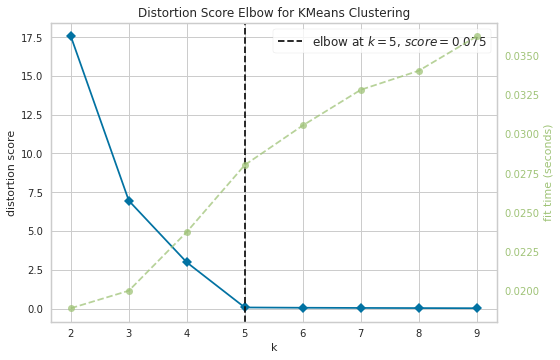

In [29]:
final_loc_stat_4 = final_loc_stat_2
cluster_2 = final_loc_stat_3.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Restaurant Count'], axis = 1)
cluster_2.rename(columns={0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Restaurant Count'}, inplace=True)

from sklearn.cluster import KMeans
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer


# Clustering model and visualiser
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(cluster_2)        
visualizer.show()        

## Clusters Analysis
### Cluster Zero

In [30]:
Tonronto_data_C0 = Toronto_data.drop(['Postcode', 'Borough'], axis = 1)
Tonronto_data_C0 = Tonronto_data_C0[Tonronto_data_C0["Cluster Labels"].isin([0])]
Tonronto_data_C0_mean = Tonronto_data_C0.mean()
print ('\n Cluster Zero Analysis')
Tonronto_data_C0_mean


 Cluster Zero Analysis


Cluster Labels                    0.000000
After-Tax Household Income    50246.285714
Total Population              14872.285714
Latitude                         43.702257
Longitude                       -79.439444
Restaurant Count                 49.714286
dtype: float64

In [31]:
stats_neighbourhood = pd.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Restaurant Count'])

Tonronto_data_C = Toronto_data.drop(['Postcode', 'Borough'], axis = 1)
Tonronto_data_C0 = Tonronto_data_C[Tonronto_data_C["Cluster Labels"].isin([1])]
Toronto_data_C0_mean = Tonronto_data_C0.mean().to_frame().transpose()

stats_neighbourhood = stats_neighbourhood.append(Toronto_data_C0_mean, ignore_index = True)
print ('\n Cluster Zero Analysis')
stats_neighbourhood


 Cluster Zero Analysis


,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Restaurant Count
0,1.0,58271.125,28469.625,43.775544,-79.196466,44.75


### All Clusters

In [32]:
i = 0
stats_neighbourhood = pd.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Restaurant Count'])

for x in range (0, 5):

    Tonronto_data_C = Toronto_data.drop(['Postcode','Borough'], axis = 1)
    Tonronto_data_C0 = Tonronto_data_C[Tonronto_data_C["Cluster Labels"].isin([i])]
    Toronto_data_C0_mean = Tonronto_data_C0.mean().to_frame().transpose()

    stats_neighbourhood = stats_neighbourhood.append(Toronto_data_C0_mean, ignore_index = True)
    i = i + 1

print ('\n All Clusters Analysis')
stats_neighbourhood


 All Clusters Analysis


,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Restaurant Count
0,0.0,50246.285714,14872.285714,43.702257,-79.439444,49.714286
1,1.0,58271.125000,28469.625000,43.775544,-79.196466,44.750000
2,2.0,46855.111111,18629.444444,43.719356,-79.291146,48.888889
3,3.0,51477.666667,12427.166667,43.652861,-79.541607,49.833333
4,4.0,54945.200000,21947.600000,43.799946,-79.333027,47.600000


In [33]:
from sklearn import preprocessing

# non-variable cols out 
stats_neighbourhood_norm = stats_neighbourhood.drop(['Cluster Labels','Latitude','Longitude', ], axis = 1)

x = stats_neighbourhood_norm.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalised = pd.DataFrame(x_scaled)
df_normalised

,0,1,2
0,0.297054,0.152415,0.976581
1,1.000000,1.000000,0.000000
2,0.000000,0.386616,0.814208
3,0.404919,0.000000,1.000000
4,0.708661,0.593452,0.560656


### Chart - Clustering

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


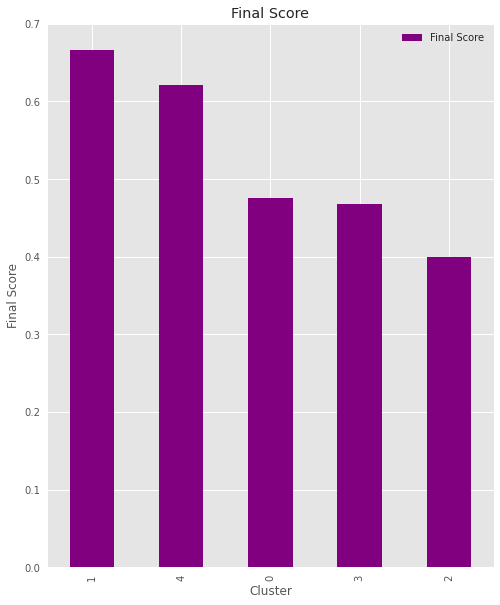

In [34]:
df_normalised_final = df_normalised.mean(axis=1).to_frame()
df_normalised_final .rename(columns={0:'Final Score'}, inplace=True)
df_normalised_final.sort_values(by='Final Score', ascending=False, inplace=True)

# plot graph
mpl.style.use('ggplot')
df_normalised_final.plot(kind='bar', figsize=(8,10), color='purple')
plt.title('Final Score')
plt.xlabel('Cluster')
plt.ylabel('Final Score')

plt.show()

In [35]:
# Absolute values for the Score
df_normalised_final

,Final Score
1,0.666667
4,0.620923
0,0.475350
3,0.468306
2,0.400275
